In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

## Задание 1
Исправьте код применения оператора Собеля, который мы писали на занятии, таким образом, чтобы оператор применялся по обоим направлениям (x и y).

In [5]:
img = cv.imread("./sudoku.png", 0)

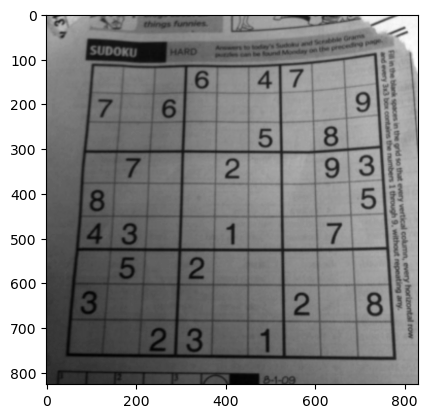

In [6]:
plt.imshow(img, cmap="gray")

In [7]:
#Вариант 1
sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=5)
sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=5)
sobel = cv.addWeighted(sobelx, 0.5, sobely, 0.5, 0)

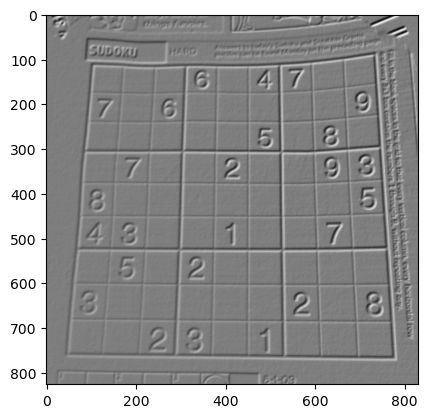

In [8]:
plt.imshow(sobel, cmap="gray")

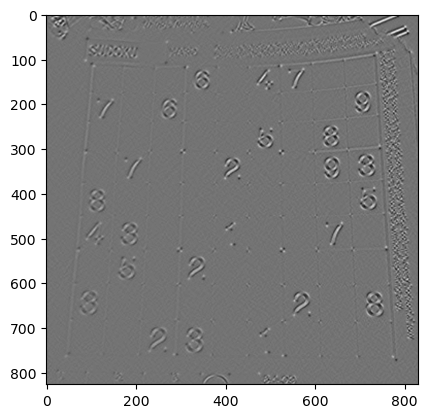

In [10]:
#Вариант 2
sobel_2 = cv.Sobel(img, cv.CV_64F, 1, 1, ksize=5)
plt.imshow(sobel_2, cmap="gray")

## Задание 2

На занятии мы попробовали несколько фильтров различного назначения (это размытие, устранение шумов, выделение границ и тд). Каждый алгоритм, осуществляющий фильтрацию изображения, обычно имеет несколько параметров, влияющих на результат (размер ядра и тд). И для того, чтобы понять, какое именно влияние оказывают каждый из параметров или их комбинация, может потребоваться перезапустить код много раз с разными значениями параметров, что не удобно. Поэтому в этом задании вам предлагается создать оконное приложение, отображающее результат применения того или иного фильтра (можете выбрать любой, например, Canny), интерфейс (кнопки, чек-боксы, ползунки и тд), позволяющий варьировать значения параметров фильтра и смотреть, как это влияет на результат в реальном времени (обновляя выводимое изображение). Пример реализации такого интерфейса на OpenCV можно найти здесь: https://docs.opencv.org/4.x/d9/dc8/tutorial_py_trackbar.html

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [3]:
img = cv.imread("./sudoku.png", 0)

In [4]:
def nothing(x):
    pass
# Create a black image, a window
cv.namedWindow('image')
# create trackbars for color change
cv.createTrackbar('threshold1','image',0,255,nothing)
cv.createTrackbar('threshold2','image',0,255,nothing)
cv.createTrackbar('apertureSize','image',3,7,nothing)
cv.setTrackbarMin('apertureSize', 'image', 3)
cv.createTrackbar('L2Gradient','image',0,1,nothing)
cv.createTrackbar('switch', 'image',0,1,nothing)

buf_image = img.copy()

while(1):
    cv.imshow('image',buf_image)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
    # get current positions of four trackbars
    threshold1_ = cv.getTrackbarPos('threshold1','image')
    threshold2_ = cv.getTrackbarPos('threshold2','image')
    if threshold1_ < threshold2_:
        apertureSize_ = cv.getTrackbarPos('apertureSize','image')
        if apertureSize_ % 2 == 1:
            L2Gradient_ = cv.getTrackbarPos('L2Gradient','image')
            s = cv.getTrackbarPos('switch','image')
            if s == 0:
                buf_image = img.copy()
            else:
                buf_image = cv.Canny(img, threshold1=threshold1_, threshold2=threshold2_, apertureSize=apertureSize_,
                                    L2gradient = L2Gradient_)
        else:
            buf_image[:] = 0
            cv.putText(buf_image,'apertureSize is not odd',(0,130), 4,1, (200,255,155))
    else:
        buf_image[:] = 0
        cv.putText(buf_image,'Error threshold1_ > threshold2_',(0,130), 4,1, (200,255,155))
cv.destroyAllWindows()

KeyboardInterrupt: 

## Задание 3

К изображению hong.png из папки необходимо подобрать такую морфологическую операцию, чтобы устранить с таблички слова, написанные черным цветом

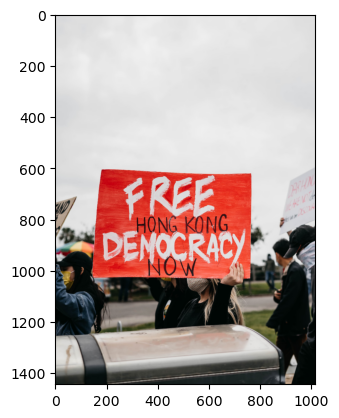

In [3]:
img = cv.cvtColor(cv.imread("./hong.png"), cv.COLOR_BGR2RGB)
plt.imshow(img)

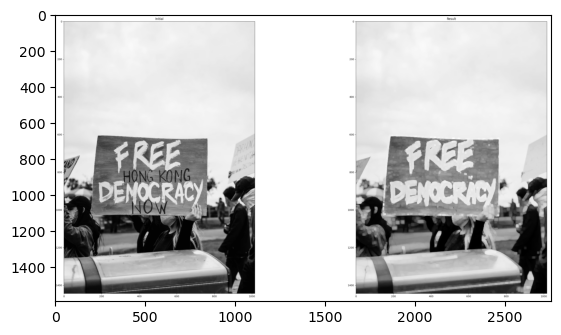

In [4]:
img2 = cv.cvtColor(cv.imread("./hong_res.png"), cv.COLOR_BGR2RGB)
plt.imshow(img2)

In [8]:
kernel = np.ones((5, 5), np.uint8) 
img_dilation = cv.dilate(img, kernel, iterations=2) 

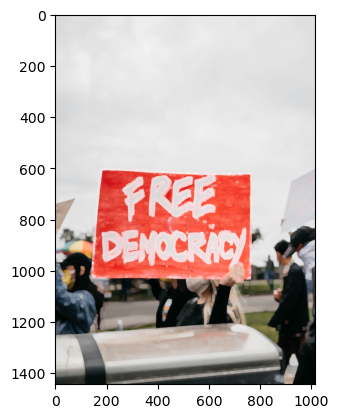

In [9]:
plt.imshow(img_dilation)